<a href="https://colab.research.google.com/github/M-qasimm/Elevvo-Projects/blob/main/Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Create dummy dataset
data = {
    'StudyHours': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Score': [50, 55, 65, 70, 65, 75, 85, 88, 95, 96]
}
df = pd.DataFrame(data)

# Show the dataset
df


,StudyHours,Score
0,1,50
1,2,55
2,3,65
3,4,70
4,5,65
5,6,75
6,7,85
7,8,88
8,9,95
9,10,96


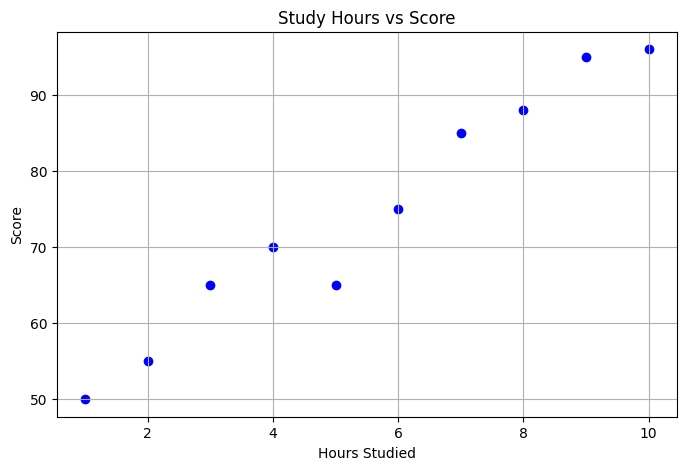

In [ ]:
# Scatter plot to visualize relationship
plt.figure(figsize=(8, 5))
plt.scatter(df['StudyHours'], df['Score'], color='blue')
plt.title('Study Hours vs Score')
plt.xlabel('Hours Studied')
plt.ylabel('Score')
plt.grid(True)
plt.show()


In [ ]:
# Step 3: Split the dataset
X = df[['StudyHours']]  # Feature (independent variable)
y = df['Score']         # Target (dependent variable)

# Split into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Print model parameters
print("Slope (Coefficient):", model.coef_[0])
print("Intercept:", model.intercept_)


Slope (Coefficient): 5.0344827586206895
Intercept: 46.560344827586206


In [ ]:
# Step 5: Make predictions
y_pred = model.predict(X_test)

# Show actual vs predicted
results = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred})
print(results)

# Step 6: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nEvaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R²): {r2:.2f}")


   Actual  Predicted
0      95   91.87069
1      55   56.62931

Evaluation Metrics:
Mean Squared Error (MSE): 6.22
Mean Absolute Error (MAE): 2.38
R-squared (R²): 0.98


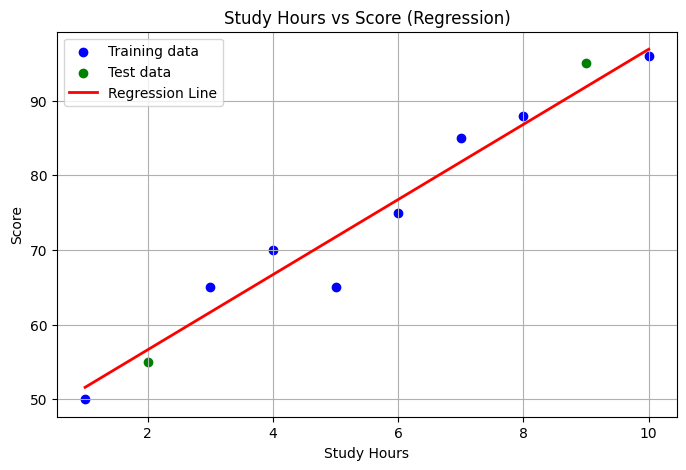

In [ ]:
# Visualize regression line with training data
plt.figure(figsize=(8, 5))
plt.scatter(X_train, y_train, color='blue', label='Training data')
plt.scatter(X_test, y_test, color='green', label='Test data')
plt.plot(X, model.predict(X), color='red', linewidth=2, label='Regression Line')
plt.title('Study Hours vs Score (Regression)')
plt.xlabel('Study Hours')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Create a polynomial model (degree 2 = quadratic)
poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())

# Train it on the same training data
poly_model.fit(X_train, y_train)

# Predict using polynomial model
y_poly_pred = poly_model.predict(X_test)

# Compare evaluation metrics
print("🔹 Polynomial Regression (Degree 2)")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_poly_pred):.2f}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_poly_pred):.2f}")
print(f"R-squared: {r2_score(y_test, y_poly_pred):.2f}")


🔹 Polynomial Regression (Degree 2)
Mean Squared Error: 6.39
Mean Absolute Error: 2.38
R-squared: 0.98


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


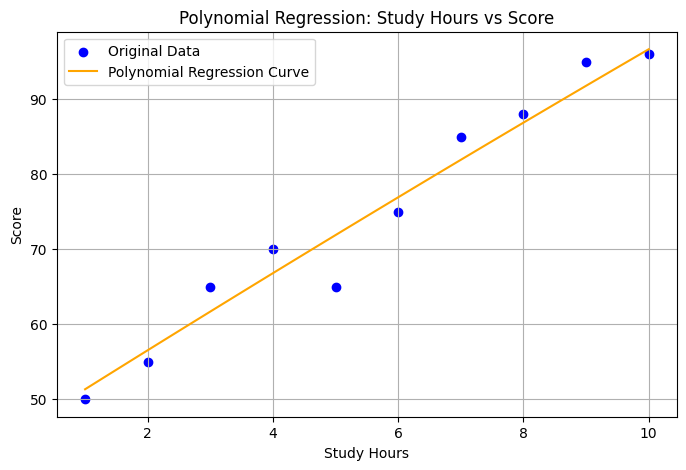

In [ ]:
import numpy as np

# Generate a smooth curve for plotting
X_range = np.linspace(min(X['StudyHours']), max(X['StudyHours']), 100).reshape(-1, 1)
y_range_pred = poly_model.predict(X_range)

plt.figure(figsize=(8, 5))
plt.scatter(X, y, color='blue', label='Original Data')
plt.plot(X_range, y_range_pred, color='orange', label='Polynomial Regression Curve')
plt.title('Polynomial Regression: Study Hours vs Score')
plt.xlabel('Study Hours')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# New dataset with more features
data_extended = {
    'StudyHours': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'SleepHours': [8, 7, 6, 6, 7, 5, 6, 7, 5, 5],
    'Participation': [2, 3, 5, 5, 4, 6, 7, 7, 8, 9],
    'Score': [50, 55, 65, 70, 65, 75, 85, 88, 95, 96]
}

df2 = pd.DataFrame(data_extended)
df2


,StudyHours,SleepHours,Participation,Score
0,1,8,2,50
1,2,7,3,55
2,3,6,5,65
3,4,6,5,70
4,5,7,4,65
5,6,5,6,75
6,7,6,7,85
7,8,7,7,88
8,9,5,8,95
9,10,5,9,96


In [ ]:
# Features and target
X2 = df2[['StudyHours', 'SleepHours', 'Participation']]
y2 = df2['Score']

# Split
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

# Train
model2 = LinearRegression()
model2.fit(X2_train, y2_train)

# Predict
y2_pred = model2.predict(X2_test)

# Evaluate
print("🔹 Multi-Feature Linear Regression")
print(f"Mean Squared Error: {mean_squared_error(y2_test, y2_pred):.2f}")
print(f"Mean Absolute Error: {mean_absolute_error(y2_test, y2_pred):.2f}")
print(f"R-squared: {r2_score(y2_test, y2_pred):.2f}")


🔹 Multi-Feature Linear Regression
Mean Squared Error: 10.99
Mean Absolute Error: 2.64
R-squared: 0.97
